In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.plot import show
from rasterio.mask import mask
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable

"""
Please note that only the visualizations for the "final" scenario are presented in the manuscript. The global-scale results for ENCS ("environment_compromise"), ECCS ("economic_compromise"), DBCS ("double_compromise"), OECS ("optimal_environmental"), and OENS ("optimal_economic") are not included in the main text or supplementary materials. To replicate the findings presented in the paper, please execute the plotting script exclusively for the "final" scenario and remove the code segments pertaining to other scenarios.
"""

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Arial']

# 1. 读取世界地图 Shapefile 文件
world_map = gpd.read_file("../../../data/geo_dataset/worldMap/世界国家分布.shp")

OSError: [Errno 22] Invalid argument: 'save/compromise/environment_compromise_env.png'

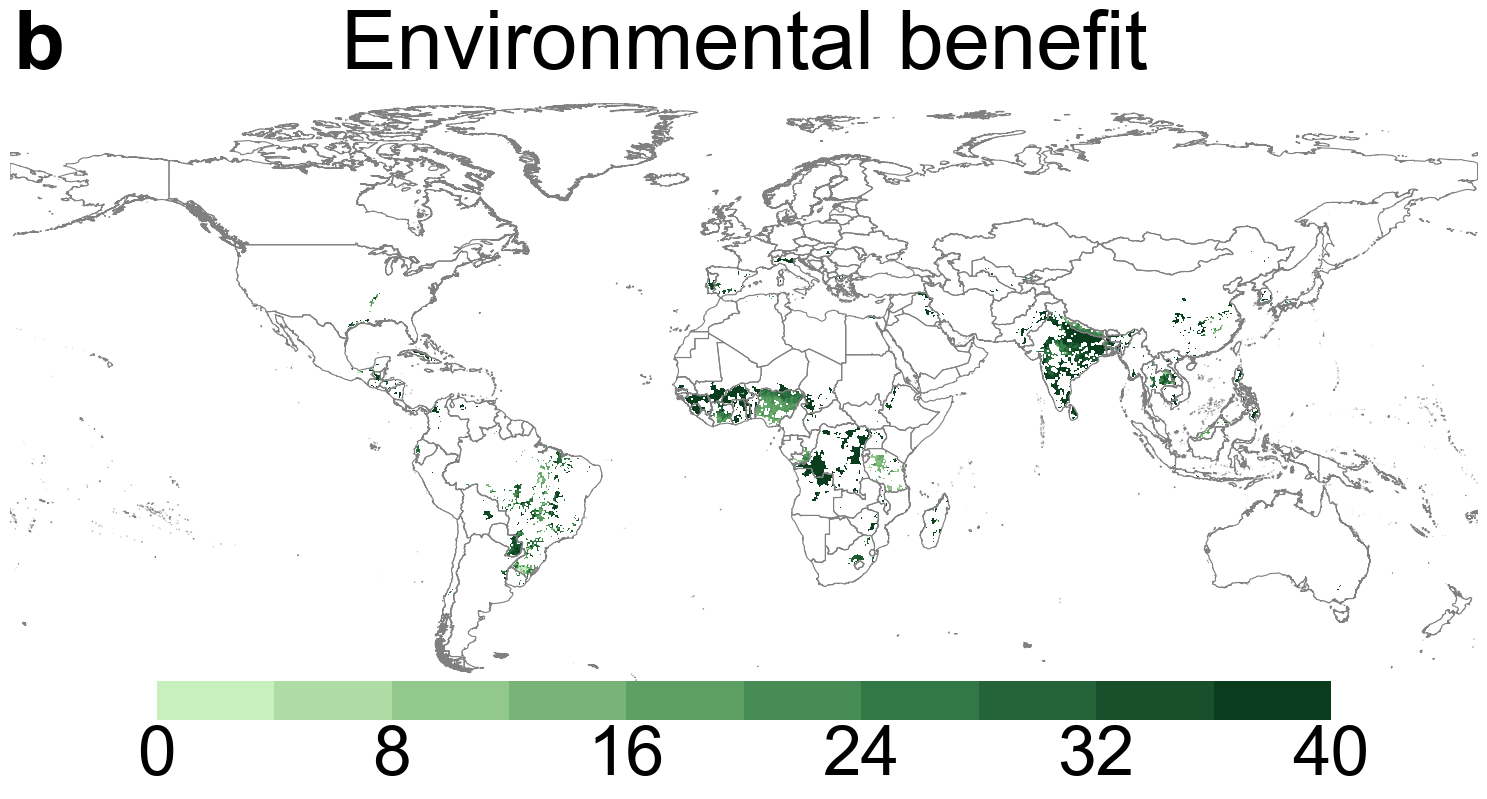

In [27]:
from matplotlib.colors import LinearSegmentedColormap, Normalize, BoundaryNorm
scenarios = [
    "final",
    "double_compromise",
    "environment_compromise",
    "economic_compromise"
]

for scenario in scenarios:
    # ========== ENV 图 ==========
    map_type = "env"

    with rasterio.open(f"tiffs/{scenario}/{scenario}_ratio_env.tif") as src:
        if src.crs != world_map.crs:
            world_map = world_map.to_crs(src.crs)
        
        tiff_data, tiff_transform = mask(src, world_map.geometry, crop=True, nodata=np.nan)
        tiff_data = np.where(tiff_data < -9999, np.nan, tiff_data)

    # 3. 设置分类参数
    vmin, vmax = 0, 0.4
    n_classes = 10  # 改为10个分类
    bounds = np.linspace(vmin, vmax, n_classes+1)
    
    # 定义10个分类颜色（删除最后一个深红色）
    custom_colors = [
    (10/255, 60/255, 30/255),      # 深绿色
    (30/255, 90/255, 50/255),      # 中等深绿色
    (50/255, 120/255, 70/255),     # 绿色
    (80/255, 150/255, 90/255),     # 浅绿色
    (120/255, 180/255, 120/255),   # 更浅的绿色
    (160/255, 210/255, 150/255),   # 非常浅的绿色
    (200/255, 240/255, 190/255),   # 非常浅的绿色
]
    custom_colors.reverse()
    cmap = LinearSegmentedColormap.from_list("custom_discrete", custom_colors)
    norm = BoundaryNorm(bounds, cmap.N)
    
    # 4. 绘制主地图（包含图例色带）
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # 绘制国家边界（浅灰色）
    world_map.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.8)
    plt.text(0.02, 1.05, 'b', transform=plt.gca().transAxes, 
         fontsize=60, fontweight='bold', 
         verticalalignment='center', horizontalalignment='center')
    plt.text(0.5, 1.05, 'Environmental benefit', transform=plt.gca().transAxes, 
         fontsize=60, 
         verticalalignment='center', horizontalalignment='center')
    
    # 绘制分类颜色栅格
    img = show(tiff_data[0], transform=tiff_transform, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1)
    
    # 设置显示范围
    ax.set_ylim(-58, 90)
    ax.set_xlim(-180, 180)
    ax.set_axis_off()

    # 添加图例（色带）
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0, aspect=30, fraction=0.05, shrink=0.8)
    cb.set_ticks(bounds)
    # 按索引每隔2取一个刻度，同时保留最后一个刻度
    cb.set_ticklabels([f"{round(x*100)}" if (i % 2 == 0) or (i == len(bounds)-1) else "" for i, x in enumerate(bounds)])
    cb.outline.set_visible(False)
    cb.ax.tick_params(labelsize=50, length=0)

    # 添加图例标题在色带上方并居中
    # 
    # legend_title = f"Projected changes (%)"
    # cb.ax.text(0.5, 1.2, legend_title, fontsize=60, ha='center', va='bottom', transform=cb.ax.transAxes)

    # 调整图例位置
    
    plt.tight_layout()
    plt.savefig(f"save/compromise/{scenario}_env.png", dpi=1000, bbox_inches='tight', pad_inches=0.01)
    plt.close()

    # ========== ECO 图 ==========
    map_type = "eco"

    with rasterio.open(f"tiffs/{scenario}/{scenario}_ratio_eco.tif") as src:
        if src.crs != world_map.crs:
            world_map = world_map.to_crs(src.crs)
        
        tiff_data, tiff_transform = mask(src, world_map.geometry, crop=True, nodata=np.nan)
        tiff_data = np.where(tiff_data < -9999, np.nan, tiff_data)

    # 3. 设置分类参数
    vmin, vmax = 0, 2
    n_classes = 10  # 改为10个分类
    bounds = np.linspace(vmin, vmax, n_classes+1)
    
    custom_colors = [(0.85, 0.92, 1.00), (0.05, 0.1, 0.5)]
    cmap = LinearSegmentedColormap.from_list("custom_discrete", custom_colors)
    norm = BoundaryNorm(bounds, cmap.N)
    
    # 4. 绘制主地图（包含图例色带）
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # 绘制国家边界（浅灰色）
    world_map.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.8)
    plt.text(0.02, 1.05, 'a', transform=plt.gca().transAxes, 
         fontsize=60, fontweight='bold', 
         verticalalignment='center', horizontalalignment='center')
    plt.text(0.5, 1.05, 'Economic benefit', transform=plt.gca().transAxes, 
         fontsize=60, 
         verticalalignment='center', horizontalalignment='center')
    
    # 绘制分类颜色栅格
    img = show(tiff_data[0], transform=tiff_transform, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1)
    
    # 设置显示范围
    ax.set_ylim(-58, 90)
    ax.set_xlim(-180, 180)
    ax.set_axis_off()

    # 添加图例（色带）
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0, aspect=30, fraction=0.05, shrink=0.8)
    cb.set_ticks(bounds)
    cb.set_ticklabels([f"{round(x*100)}" if (i % 2 == 0) or (i == len(bounds)-1) else "" for i, x in enumerate(bounds)])
    cb.outline.set_visible(False)
    cb.ax.tick_params(labelsize=50, length=0)

    # 添加图例标题在色带上方并居中
    # legend_title = f"Projected changes (%)"
    # cb.ax.text(0.5, 1.2, legend_title, fontsize=60, ha='center', va='bottom', transform=cb.ax.transAxes)
    plt.tight_layout()
    plt.savefig(f"save/compromise/{scenario}_eco.png", dpi=1000, bbox_inches='tight', pad_inches=0.01)
    plt.close()

In [ ]:
scenarios = [
    "optimal_environmental",
]

for scenario in scenarios:
    # ========= 环境效益图 =========
    map_type = "env"
    with rasterio.open(f"tiffs/{scenario}/{scenario}_ratio_env.tif") as src:
        if src.crs != world_map.crs:
            world_map = world_map.to_crs(src.crs)
        
        tiff_data, tiff_transform = mask(src, world_map.geometry, crop=True, nodata=np.nan)
        tiff_data = np.where(tiff_data < -9999, np.nan, tiff_data)

    # 3. 设置分类参数
    vmin, vmax = 0, 2
    n_classes = 10
    bounds = np.linspace(vmin, vmax, n_classes + 1)
    
    # 定义分类颜色
    custom_colors = [
        (94/255, 79/255, 162/255),
        (83/255, 139/255, 216/255),
        (116/255, 185/255, 255/255),
        (173/255, 220/255, 247/255),
        (217/255, 240/255, 247/255),
        (255/255, 255/255, 191/255),
        (254/255, 224/255, 139/255),
        (253/255, 174/255, 97/255),
        (244/255, 109/255, 67/255),
        (213/255, 62/255, 79/255)
    ]
    cmap = ListedColormap(custom_colors)
    norm = BoundaryNorm(bounds, cmap.N)

    # 4. 绘制主图 + 图例
    fig, ax = plt.subplots(figsize=(15, 10.2))
    world_map.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.8)
    show(tiff_data[0], transform=tiff_transform, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1)
    ax.set_ylim(-58, 90)
    ax.set_xlim(-180, 180)
    ax.set_axis_off()

    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=30, fraction=0.05, shrink=0.8)
    cb.set_ticks(bounds)
    cb.set_ticklabels([f"{round(x*100)}" if (i % 2 == 0) or (i == len(bounds)-1) else "" for i, x in enumerate(bounds)])
    cb.outline.set_visible(False)
    cb.ax.tick_params(labelsize=50, length=0)

    # 添加图例标题
    
    legend_title = f"Projected changes (%)"
    cb.ax.text(0.5, 1.2, legend_title,  fontsize=60, ha='center', va='bottom', transform=cb.ax.transAxes)

    plt.tight_layout()
    plt.savefig(f"save/extreme/{scenario}_env.png", dpi=1000, bbox_inches='tight', pad_inches=0.01)
    plt.close()

    # ========= 经济效益图 =========
    map_type = "eco"
    with rasterio.open(f"tiffs/{scenario}/{scenario}_ratio_eco.tif") as src:
        if src.crs != world_map.crs:
            world_map = world_map.to_crs(src.crs)
        
        tiff_data, tiff_transform = mask(src, world_map.geometry, crop=True, nodata=np.nan)
        tiff_data = np.where(tiff_data < -9999, np.nan, tiff_data)

    # 3. 设置分类参数
    vmin, vmax = -8, 2
    n_classes = 10
    bounds = np.linspace(vmin, vmax, n_classes + 1)
    
    # 重用 custom_colors
    cmap = ListedColormap(custom_colors)
    norm = BoundaryNorm(bounds, cmap.N)

    # 4. 绘制主图 + 图例
    fig, ax = plt.subplots(figsize=(15, 10))
    world_map.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.8)
    show(tiff_data[0], transform=tiff_transform, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1)
    ax.set_ylim(-58, 90)
    ax.set_xlim(-180, 180)
    ax.set_axis_off()

    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=30, fraction=0.05, shrink=0.8)
    cb.set_ticks(bounds)
    cb.set_ticklabels([f"{round(x*100)}" if (i % 2 == 0) or (i == len(bounds)-1) else "" for i, x in enumerate(bounds)])
    cb.outline.set_visible(False)
    cb.ax.tick_params(labelsize=50, length=0)

    
    legend_title = f"Projected changes (%)"
    cb.ax.text(0.5, 1.2, legend_title,  fontsize=60, ha='center', va='bottom', transform=cb.ax.transAxes)

    plt.tight_layout()
    plt.savefig(f"save/extreme/{scenario}_eco.png", dpi=1000, bbox_inches='tight', pad_inches=0.01)
    plt.close()

#
scenarios = [
    "optimal_economic",
]

for scenario in scenarios:
    # ========= 环境效益图 =========
    map_type = "env"
    with rasterio.open(f"tiffs/{scenario}/{scenario}_ratio_env.tif") as src:
        if src.crs != world_map.crs:
            world_map = world_map.to_crs(src.crs)

        tiff_data, tiff_transform = mask(src, world_map.geometry, crop=True, nodata=np.nan)
        tiff_data = np.where(tiff_data < -9999, np.nan, tiff_data)

    # 3. 设置分类参数
    vmin, vmax = -0.5, 0.5
    n_classes = 10  # 改为10个分类
    bounds = np.linspace(vmin, vmax, n_classes+1)

    # 定义10个分类颜色
    custom_colors = [
        (94/255, 79/255, 162/255),   # 紫色
        (83/255, 139/255, 216/255),  # 中蓝色
        (116/255, 185/255, 255/255), # 浅蓝色
        (173/255, 220/255, 247/255), # 更浅的蓝色
        (217/255, 240/255, 247/255), # 非常浅的蓝色
        (255/255, 255/255, 191/255), # 浅黄色
        (254/255, 224/255, 139/255), # 黄色
        (253/255, 174/255, 97/255),  # 橙色
        (244/255, 109/255, 67/255),  # 红橙色
        (213/255, 62/255, 79/255)    # 红色
    ]
    cmap = ListedColormap(custom_colors)
    norm = BoundaryNorm(bounds, cmap.N)

    # 4. 绘制主图 + 图例
    fig, ax = plt.subplots(figsize=(15, 10))
    world_map.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.8)
    show(tiff_data[0], transform=tiff_transform, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1)
    ax.set_ylim(-58, 90)
    ax.set_xlim(-180, 180)
    ax.set_axis_off()

    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=30, fraction=0.05, shrink=0.8)
    cb.set_ticks(bounds)
    cb.set_ticklabels([f"{round(x*100)}" if (i % 2 == 0) or (i == len(bounds)-1) else "" for i, x in enumerate(bounds)])
    cb.outline.set_visible(False)
    cb.ax.tick_params(labelsize=50, length=0)

    
    legend_title = f"Projected changes (%)"
    cb.ax.text(0.5, 1.2, legend_title,  fontsize=60, ha='center', va='bottom', transform=cb.ax.transAxes)

    plt.tight_layout()
    plt.savefig(f"save/extreme/{scenario}_env.png", dpi=1000, bbox_inches='tight', pad_inches=0.01)
    plt.close()

    # ========= 经济效益图 =========
    map_type = "eco"
    with rasterio.open(f"tiffs/{scenario}/{scenario}_ratio_eco.tif") as src:
        if src.crs != world_map.crs:
            world_map = world_map.to_crs(src.crs)

        tiff_data, tiff_transform = mask(src, world_map.geometry, crop=True, nodata=np.nan)
        tiff_data = np.where(tiff_data < -9999, np.nan, tiff_data)

    # 3. 设置分类参数
    vmin, vmax = 0, 2
    n_classes = 10
    bounds = np.linspace(vmin, vmax, n_classes+1)

    # 重用 custom_colors
    cmap = ListedColormap(custom_colors)
    norm = BoundaryNorm(bounds, cmap.N)

    # 4. 绘制主图 + 图例
    fig, ax = plt.subplots(figsize=(15, 10))
    world_map.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.8)
    show(tiff_data[0], transform=tiff_transform, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1)
    ax.set_ylim(-58, 90)
    ax.set_xlim(-180, 180)
    ax.set_axis_off()

    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=30, fraction=0.05, shrink=0.8)
    cb.set_ticks(bounds)
    cb.set_ticklabels([f"{round(x*100)}" if (i % 2 == 0) or (i == len(bounds)-1) else "" for i, x in enumerate(bounds)])
    cb.outline.set_visible(False)
    cb.ax.tick_params(labelsize=50, length=0)

    
    legend_title = f"Projected changes (%)"
    cb.ax.text(0.5, 1.2, legend_title,  fontsize=60, ha='center', va='bottom', transform=cb.ax.transAxes)

    plt.tight_layout()
    plt.savefig(f"save/extreme/{scenario}_eco.png", dpi=1000, bbox_inches='tight', pad_inches=0.01)
    plt.close()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.plot import show
from rasterio.mask import mask
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable
import pandas as pd

final_delta_df = pd.read_csv('../../../runs/aggregate/final_delta_iNEEB.csv')
baseline_df = pd.read_csv('../../../runs/aggregate/baseline_aggregate.csv')
final_merge_df = pd.merge(final_delta_df, baseline_df, on='ISO3', how='left', suffixes=("_final", "_baseline"))
final_delta_df['iNEEB_re_rate'] = final_merge_df['Total_ECOB_final'] / abs(final_merge_df['Total_ECOB_baseline']) * 100
final_delta_df['iNEEB_im_rate'] = - final_merge_df['Total_ENVC_final'] / abs(final_merge_df['Total_ENVC_baseline']) * 100
draw_df = final_delta_df[['ISO3', 'iNEEB_re_rate', 'iNEEB_im_rate']]
draw_df.to_csv("final_iNEEB_change_rate.csv", index=False)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap, Normalize, BoundaryNorm
# 设置字体为 Arial
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Arial']
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial'
plt.rcParams['mathtext.bf'] = 'Arial'

colors_yield = [
    (235/255,204/255,226/255),
    (131/255,36/255,64/255),
]

def plot_country_map(shp_path, dataframe, country_col, value_col, 
                    legend_title, output_path, vmin=None, vmax=None, 
                    discrete_colors=colors_yield, num_classes=10, labelal=None):
    """
    绘制国家地图并保存到指定路径
    
    参数:
    shp_path -- shapefile文件路径
    dataframe -- 包含国家代码和值的数据框
    country_col -- 国家代码列名
    value_col -- 要绘制的值列名
    legend_title -- 图例标题
    output_path -- 输出图片路径
    vmin -- 颜色范围最小值
    vmax -- 颜色范围最大值
    discrete_colors -- 离散颜色列表
    num_classes -- 离散分类数量
    """
    # 1. 读取世界地图 Shapefile 文件
    world_map = gpd.read_file(shp_path)
    
    # 2. 准备数据
    value_dict = dataframe.set_index(country_col)[value_col].to_dict()
    world_map['plot_value'] = world_map['SOC'].map(value_dict)
    
    # 3. 确定值范围
    if vmin is None:
        vmin = dataframe[value_col].min()
    if vmax is None:
        vmax = dataframe[value_col].max()
    
    
    # 4. 创建离散色带
    cmap = LinearSegmentedColormap.from_list("custom_discrete", discrete_colors)
    bounds = np.linspace(vmin, vmax, num_classes+1)
    norm = BoundaryNorm(bounds, cmap.N)
    
    # 5. 创建图形
    fig, ax = plt.subplots(figsize=(15, 10.2))
    
    # 6. 绘制地图
    world_map.boundary.plot(ax=ax, edgecolor='black', linewidth=0.4)
    world_map.plot(ax=ax, column='plot_value', cmap=cmap, norm=norm, 
                   linewidth=0.8, edgecolor='0.8', legend=False)
    plt.text(0.02, 0.97, labelal, transform=plt.gca().transAxes, 
         fontsize=60, fontweight='bold', 
         verticalalignment='top', horizontalalignment='left')
    
    
    # 7. 添加图例（保持与原始代码一致的位置）
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=30, fraction=0.05, shrink=0.8)
    cb.set_ticks(bounds)
    cb.set_ticklabels([f"{round(x)}" if (i % 2 == 0) or (i == len(bounds)-1) else "" for i, x in enumerate(bounds)])
    cb.outline.set_visible(False)
    cb.ax.tick_params(labelsize=50, length=0)

    cb.ax.text(0.5, 1.2, legend_title,  fontsize=60, ha='center', va='bottom', transform=cb.ax.transAxes)
    
    # 9. 设置显示范围
    ax.set_ylim(-58, 90)
    ax.set_xlim(-180, 180)
    ax.set_axis_off()
    plt.tight_layout()
    # 10. 保存图像
    plt.savefig(output_path, dpi=1000, bbox_inches='tight', pad_inches=0.01)
    plt.close()
    

plot_country_map(
            shp_path="../../../data/geo_dataset/worldMap/世界国家分布.shp",
            dataframe=draw_df,
            country_col="ISO3",  # 使用ISO3代码列
            value_col="iNEEB_re_rate",
            legend_title="Projected changes (%)",
            output_path="save/final_iNEEB_re_rate.png",
            vmin=0,  # 自动确定最小值
            vmax=150,   # 自动确定最大值
        )

In [ ]:
green_to_blue_colors = [
    (10/255, 60/255, 30/255),      # 深绿色
    (30/255, 90/255, 50/255),      # 中等深绿色
    (50/255, 120/255, 70/255),     # 绿色
    (80/255, 150/255, 90/255),     # 浅绿色
    (120/255, 180/255, 120/255),   # 更浅的绿色
    (160/255, 210/255, 150/255),   # 非常浅的绿色
    (200/255, 240/255, 190/255),   # 非常浅的绿色
    # (208/255, 228/255, 239/255)    # 保持不变的浅蓝色(与您提供的第一个颜色相同)
]

green_to_blue_colors.reverse()

plot_country_map(
            shp_path="../../../data/geo_dataset/worldMap/世界国家分布.shp",
            dataframe=draw_df,
            country_col="ISO3",  # 使用ISO3代码列
            value_col="iNEEB_im_rate",
            legend_title="Projected changes (%)",
            output_path="save/final_iNEEB_im_rate.png",
            vmin=0,  # 自动确定最小值
            vmax=50,   # 自动确定最大值
            discrete_colors=green_to_blue_colors
        )

In [28]:
from matplotlib.colors import LinearSegmentedColormap, Normalize, BoundaryNorm
#['CH4', 'N2O', 'SOCSR', 'Yield', 'NH3', 'NL', 'NR', 'NO']
target_label_dict = {'CH4': 'd', 'N2O': 'e', 'SOCSR': 'f', 'Yield': 'c', 'NH3': 'g', 'N': 'h', 'NO': 'i'}
for obj in ['Yield']:
    with rasterio.open(f"../../Supplementary/Fig SX-ML mapping/tiffs/final_ratio/{obj}_mean_final_ratio.tif") as src:
        if src.crs != world_map.crs:
            world_map = world_map.to_crs(src.crs)
        
        tiff_data, tiff_transform = mask(src, world_map.geometry, crop=True, nodata=np.nan)
        tiff_data = np.where(tiff_data < -9999, np.nan, tiff_data)
        tiff_data = tiff_data
    
    # 3. 设置分类参数
    vmin, vmax = 0, 40
    n_classes = 10  # 改为10个分类
    bounds = np.linspace(vmin, vmax, n_classes+1)
    
    # 定义10个分类颜色（删除最后一个深红色）
    custom_colors = [
        (235/255,204/255,226/255),
        (131/255,36/255,64/255),
    ]
    cmap = LinearSegmentedColormap.from_list("custom_discrete", custom_colors)
    norm = BoundaryNorm(bounds, cmap.N)
    
    # 4. 绘制主地图（包含图例色带）
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # 绘制国家边界（浅灰色）
    world_map.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.8)
    plt.text(0.02, 1.05, target_label_dict[obj], transform=plt.gca().transAxes, 
         fontsize=60, fontweight='bold', 
         verticalalignment='center', horizontalalignment='center')
    plt.text(0.5, 1.05, 'Yield', transform=plt.gca().transAxes, 
         fontsize=60, 
         verticalalignment='center', horizontalalignment='center')
    
    # 绘制分类颜色栅格
    img = show(tiff_data[0], transform=tiff_transform, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1)
    
    # 设置显示范围|
    ax.set_ylim(-58, 90)
    ax.set_xlim(-180, 180)
    ax.set_axis_off()
    
    # 添加图例（色带）
    
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0, aspect=30, fraction=0.05, shrink=0.8)
    cb.set_ticks(bounds)
    cb.set_ticklabels([f"{round(x)}" if (i % 2 == 0) or (i == len(bounds)-1) else "" for i, x in enumerate(bounds)])
    cb.outline.set_visible(False)
    cb.ax.tick_params(labelsize=50, length=0)
    
    
    # 添加图例标题在色带上方并居中
    # 
    # legend_title = f"Projected changes (%)"
    # cb.ax.text(0.5, 1.2, legend_title,  fontsize=60, ha='center', va='bottom', transform=cb.ax.transAxes)
    
    # 调整图例位置
    plt.tight_layout()
    plt.savefig(f"save/details/{obj}_ratio.tif", dpi=1000, bbox_inches='tight', pad_inches=0.01)
    plt.close()

In [29]:
from matplotlib.mathtext import _mathtext as mathtext
mathtext.FontConstantsBase.sup1 = 0.1
mathtext.FontConstantsBase.sub1 = 0.1
mathtext.FontConstantsBase.sup2 = 0.1
mathtext.FontConstantsBase.sub2 = 0.1
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Arial']
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial'
plt.rcParams['mathtext.bf'] = 'Arial'
# 在循环开始前定义图例相关的参数（这样所有图例保持一致）
vmin, vmax = -100, 100
n_classes = 10
bounds = np.linspace(vmin, vmax, n_classes+1)


# 定义10个分类颜色
custom_colors = [
    (195/255, 58/255, 59/255),
    (220/255, 80/255, 70/255),
    (242/255, 120/255, 100/255),
    (255/255, 160/255, 140/255),
    (255/255, 200/255, 180/255),
    (168/255, 221/255, 232/255),
    (150/255, 200/255, 220/255),
    (130/255, 180/255, 210/255),
    (110/255, 160/255, 200/255),
    (85/255, 140/255, 190/255),
]
custom_colors.reverse()
cmap = ListedColormap(custom_colors)
norm = BoundaryNorm(bounds, cmap.N)

name_dict = {'N': 'N leaching & runoff', 'CH4': f'CH$_{{4}}$', 'N2O': f'N$_{{2}}$O' , 'SOCSR': r'$\Delta$SOC', 'NH3':f'NH$_{{3}}$', 'NO': 'NO'}

for obj in ['N', 'CH4', 'N2O', 'SOCSR', 'NH3', 'NO']:
    with rasterio.open(f"../../Supplementary/Fig SX-ML mapping/tiffs/final_ratio/{obj}_mean_final_ratio.tif") as src:
        if src.crs != world_map.crs:
            world_map = world_map.to_crs(src.crs)
        
        tiff_data, tiff_transform = mask(src, world_map.geometry, crop=True, nodata=np.nan)
        tiff_data = np.where(tiff_data < -9999, np.nan, tiff_data)
        tiff_data = tiff_data
    
    # 4. 绘制主地图（不包含图例色带）
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # 绘制国家边界（浅灰色）
    world_map.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.8)
    plt.text(0.02, 1.05, target_label_dict[obj], transform=plt.gca().transAxes, 
         fontsize=60, fontweight='bold', 
         verticalalignment='center', horizontalalignment='center')
    plt.text(0.5, 1.05, name_dict[obj], transform=plt.gca().transAxes, 
         fontsize=60, 
         verticalalignment='center', horizontalalignment='center')
    # 绘制分类颜色栅格
    img = show(tiff_data[0], transform=tiff_transform, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1)
    
    # 设置显示范围
    ax.set_ylim(-58, 90)
    ax.set_xlim(-180, 180)
    ax.set_axis_off()
    
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0, aspect=30, fraction=0.05, shrink=0.8)
    cb.set_ticks(bounds)
    cb.set_ticklabels([f"{round(x)}" if (i % 2 == 0) or (i == len(bounds)-1) else "" for i, x in enumerate(bounds)])
    cb.outline.set_visible(False)
    cb.ax.tick_params(labelsize=50, length=0)
    
    plt.tight_layout()
    # 保存主地图（不包含图例）
    plt.savefig(f"save/details/{obj}_ratio.tif", dpi=1000, bbox_inches='tight', pad_inches=0.01)
    plt.close()
    
    # # 5. 单独创建并保存图例
    # fig_legend = plt.figure(figsize=(15, 2))  # 创建专门用于图例的图形
    # ax_legend = fig_legend.add_subplot(111)
    # 
    # # 创建ScalarMappable对象
    # sm = ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array([])
    # 
    # # 添加颜色条
    # cb = fig_legend.colorbar(sm, cax=ax_legend, orientation='horizontal')
    # cb.set_ticks(bounds)
    # cb.set_ticklabels([f"{round(x)}" if (i % 2 == 0) or (i == len(bounds)-1) else "" for i, x in enumerate(bounds)])
    # cb.outline.set_visible(False)
    # cb.ax.tick_params(labelsize=50, length=0)
    # 
    # # 添加图例标题
    # legend_title = "Projected changes (%)"
    # cb.ax.text(0.5, 1.2, legend_title, fontsize=60, ha='center', va='bottom', transform=cb.ax.transAxes)
    # 
    # # 调整布局
    # plt.tight_layout()
    # 
    # # 保存单独的图例文件
    # plt.savefig(f"save/details/ratio_legend.png", dpi=1000, bbox_inches='tight', pad_inches=0.01)
    # plt.close()

print("所有地图和图例已保存完成！")

所有地图和图例已保存完成！


In [30]:
# 5. 单独创建并保存图例
fig_legend = plt.figure(figsize=(30, 0.5))  # 创建专门用于图例的图形
ax_legend = fig_legend.add_subplot(111)

# 创建ScalarMappable对象
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# 添加颜色条
cb = fig_legend.colorbar(sm, cax=ax_legend, orientation='horizontal')
cb.set_ticks(bounds)
cb.set_ticklabels([f"{round(x)}" if (i % 2 == 0) or (i == len(bounds)-1) else "" for i, x in enumerate(bounds)])
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=50, length=0)

# 添加图例标题
legend_title = "Projected changes (%)"
cb.ax.text(0.5, 1.2, legend_title, fontsize=60, ha='center', va='bottom', transform=cb.ax.transAxes)

# 调整布局
plt.tight_layout()

# 保存单独的图例文件
plt.savefig(f"save/details/ratio_legend.tif", dpi=1000, bbox_inches='tight', pad_inches=0.01)
plt.close()

C:\Users\JZ\AppData\Local\Temp\ipykernel_34804\372778887.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
